In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#importing the necessary libraries for performing lane detection

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


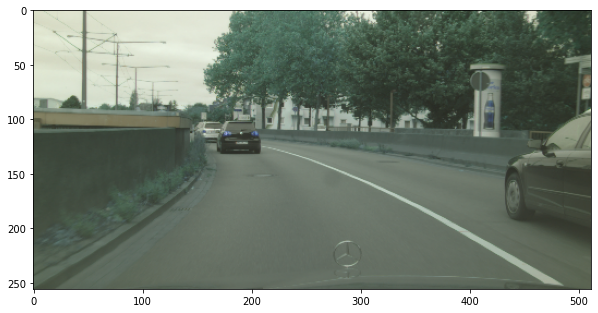

In [166]:
img_og=cv2.imread('/content/drive/MyDrive/Task 4 Images/raw_images/High_illumination/bremen_000156_000019_leftImg8bit.png',-1)
plt.figure(figsize=[10,10])
plt.imshow(img_og) #reading an image from the uploaded set

In [167]:
#Step-1 ----
#Conversion of BGR image to grayscale

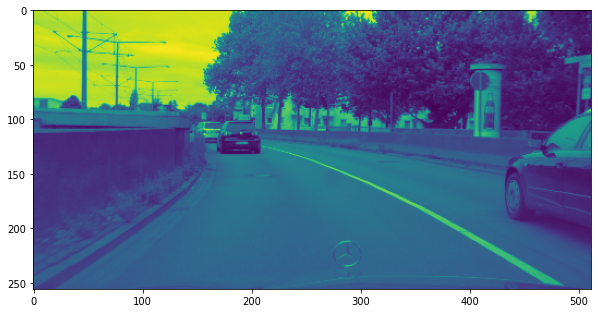

In [168]:
img_gray=cv2.cvtColor(img_og,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=[10,10])
plt.imshow(img_gray)

In [169]:
#Step-2 ----
#Applying Gaussian Blur to smoothen image and reduce noise

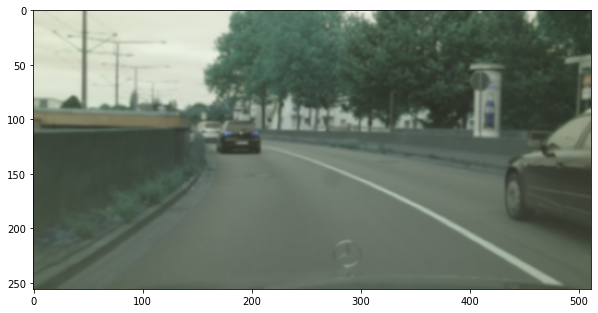

In [170]:
img_gauss=cv2.GaussianBlur(img_og,(5,5),0)
plt.figure(figsize=[10,10])
plt.imshow(img_gauss)

In [171]:
#Step-3 ----
#Applying Canny to the Gaussian Blurred Image for outlining the edges of the image - edge detection

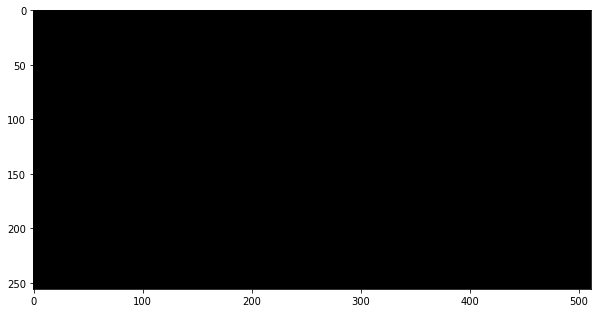

In [172]:
img_canny=np.zeros_like(img_og)
plt.figure(figsize=[10,10])
plt.imshow(img_canny)


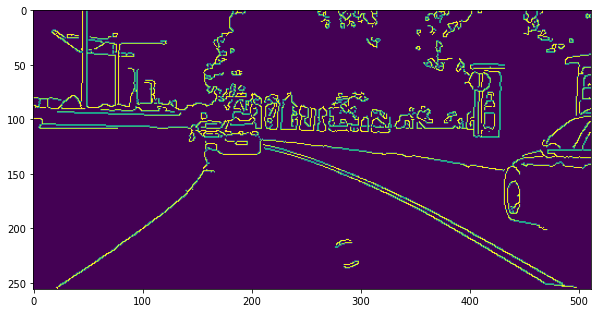

In [173]:
img_canny=cv2.Canny(img_gauss,30,120)
plt.figure(figsize=[10,10])
plt.imshow(img_canny)  

In [174]:
def dimension(image):
  t=image.shape
  return t

In [175]:
t0=dimension(img_og)

In [176]:
#Step-4 ----
#Building a polygon in order to detect the movable area(lane) in the image - This is basically the filtering out process

In [177]:
polygon_og= np.array([[(0,t0[0]),(0,150),(250,125),(280,125),(600,150),(600,t0[0])]]) #We create a generic polygon which covers most of the lane covered areas for our model

In [178]:
#Step-5 ----
#Creating a null array of dimensions equal to the cannied images

In [179]:
m0=np.zeros_like(img_canny)

In [180]:
m0=cv2.fillPoly(m0,polygon_og,(255,255,255))

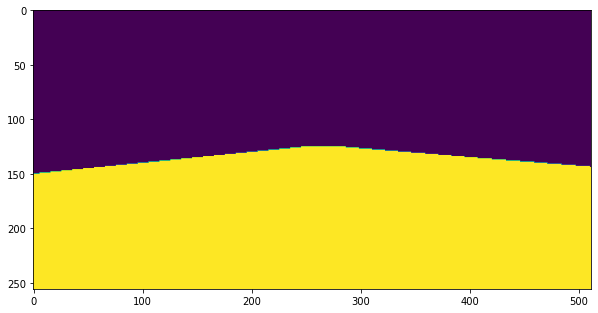

In [181]:
plt.figure(figsize=[10,10])
plt.imshow(m0)

In [182]:
m0=cv2.bitwise_and(img_canny,m0) #We apply the bitwise_and operator which basically performs intersection of the mask and the cannied image - filtering only the lanes

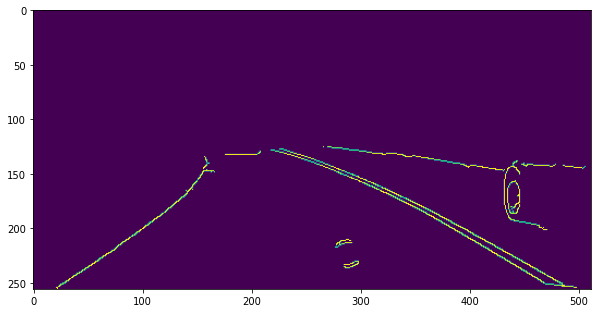

In [183]:
plt.figure(figsize=[10,10])
plt.imshow(m0)

In [185]:
m3=np.asarray(m0)

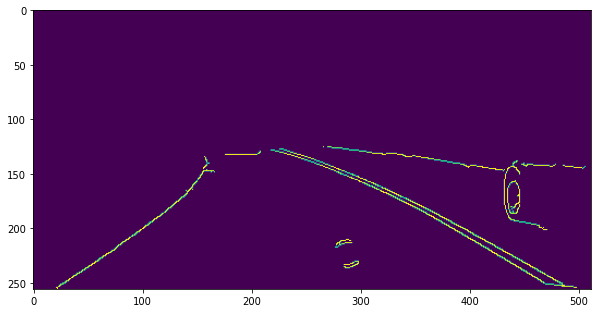

In [186]:
plt.figure(figsize=[10,10])
plt.imshow(m3)

In [189]:
img_gray=cv2.cvtColor(img_og,cv2.COLOR_BGR2GRAY)

In [144]:
ret, thresh = cv2.threshold(m0, 10, 255, cv2.THRESH_BINARY)
h,w=thresh.shape[:2] #We perform a threshold process so as to filter in only pixels in the 127-255 range

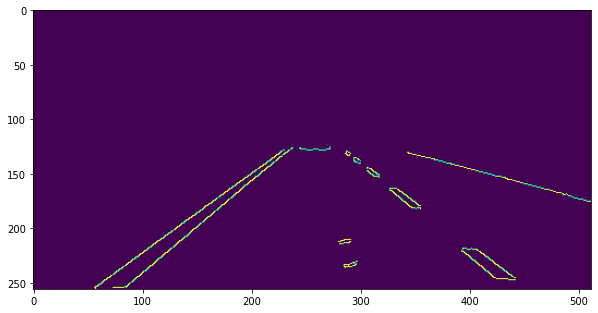

In [145]:
plt.figure(figsize=(10,10))
plt.imshow(thresh)

In [146]:
#Step-6 ---
#Contour Detection in order to create segmentation maps - 
#here cv2.RETR_TREE : Detects the Possible Contour Lines
#here cv2.CHAIN_APPROX_NONE : Stores all the boundary points - an alternate being cv2.CHAIN_APPROX_SIMPLE

In [148]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [149]:
roi_mask=np.zeros_like(img_og)
roi_mask1=np.zeros_like(img_og)

In [150]:
cv2.drawContours(roi_mask, contours, -1, (255,255,255), 3) #Drawing the Contours on the mask created from the original image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

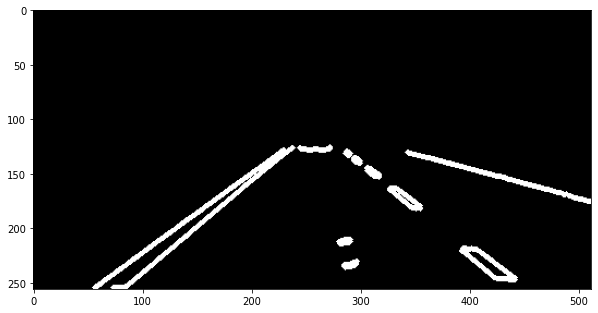

In [151]:
plt.figure(figsize=[10,10])
plt.imshow(roi_mask) #Here displayed is a partial segmentation map of the lanes - only fallacy being not being able to fill the road with bright pixels

In [154]:
m1=cv2.bitwise_or(img_og,roi_mask)

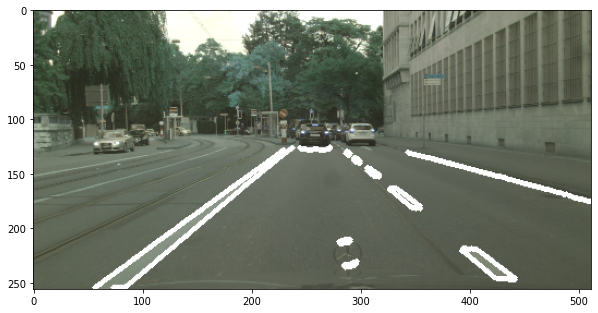

In [155]:
plt.figure(figsize=(10,10))
plt.imshow(m1)

In [157]:
polygon_c= np.array([[(0,t0[0]),(0,150),(250,125),(280,125),(600,150),(600,t0[0])]])
m2=np.zeros_like(img_og)
m2=cv2.fillPoly(m2,polygon_c,(255,255,255))

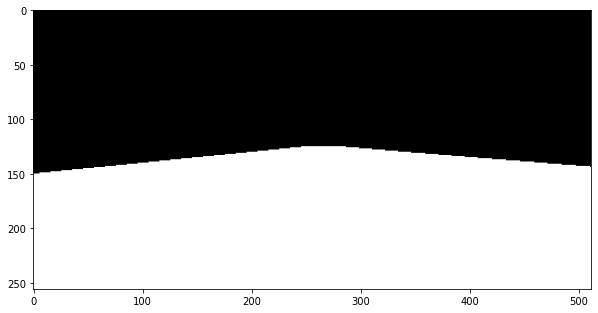

In [158]:
plt.figure(figsize=(10,10))
plt.imshow(m2)

In [164]:
m2=cv2.bitwise_or(m1,m2)

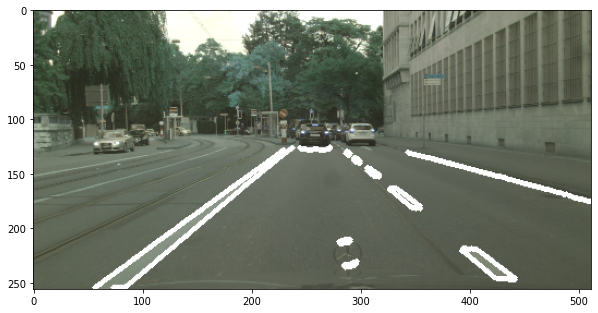

In [165]:
plt.figure(figsize=(10,10))
plt.imshow(m2)

In [ ]:
import matplotlib

In [ ]:
matplotlib.image.imsave('zurich_segment.png', roi_mask)